In [87]:
import matplotlib.pylab as plt

#웹크롤링
-크롤링 절차
    -1 웹서비스 확인 : URL
    -2 URL>request, resoponse : json(str)
    -3 .json(str)> dict(parsing) : DataFrame
-naver stock data
    코스피 코스닥 로그인 

In [55]:
import requests#

request header 에 있는 user-agent를 서버가 확인함 fake 유저를 넣어줘야함 

In [95]:
# 1. URL
code, page_size, page = "KOSPI", 20, 1
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code, page_size, page)
url

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1'

In [96]:
# 2. URL > req, rep : JSON(str)
response = requests.get(url)
response

<Response [200]>

In [97]:
# 3. JSON(str) > dict(parsing) : DF
datas = response.json()["result"]["siseList"]
kospi_df = pd.DataFrame(datas)
kospi_df.tail(2)

,cd,dt,ncv,cv,cr,ov,hv,lv
18,KOSPI,20200602,2087.19,22.11,1.07,2061.45,2089.43,2059.14
19,KOSPI,20200601,2065.08,35.48,1.75,2037.04,2065.38,2035.63


In [98]:
# function

def get_stock_data(code="KOSPI", page_size=20, page=1):
    url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}".format(code, page_size, page)
    response = requests.get(url)
    return pd.DataFrame(response.json()["result"]["siseList"]) 




In [99]:
kospi_df = get_stock_data(page_size=100)
kosdaq_df = get_stock_data("KOSDAQ", 100)

In [100]:
# 1. URL
code, page_size, page = "FX_USDKRW", 100, 1
url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?\
marketIndexCd={}&pageSize={}&page={}".format(code, page_size, page)

# 2. req, rep, header 설정(cookie) : JSON
headers = {"cookie": "NNB=R27GAM3VUSIV4; NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; MM_NEW=1; NFS=2; NID_AUT=E3RB13WPONA9X6Qq/IBZSKWuqNzfyVIuN4Cu1fTj37/NOnImuTAOKZuNWIzt2chB; NID_JKL=YE+tmQlvmG+Ccj5gYv6w1RLPKWhdvA89tsRPPj3gpXI=; ASID=01e8229c000001720147ab610000006c; nid_tct=ArfgbAp0q2yzDY81; page_uid=UYeAzdp0Jy0ssji8tA4sssssskC-338971; nx_ssl=2; NID_SES=AAABiy1EXfuAamL8fd/ZCwHdF9SQXyMmgAHvsLW7ZPUeNHH58ag305UgztmCCpM+3JczgY0A4cIezqnEDmVBbr2sSlN8MmwsV0A/8L9TnTfzwghhBoHdg/lK+ILpqfREnmZfpWeH9Yez1Igy9g6sPuGCAaQXh5xegZUE/1GhCr1iltluykeKWPKk+Wu9FjB4dvNObj9rFku0VyGQSwR0LLRE1oGp78u0R6VIVcCv4MoTBonGq1F++0aH01vZKLDDIDBpE6xs7Y0p5RfF3BfnNqyiZ2qvS7ddj638+9lCdjBvtcmXKoP2xDf/yocWu59eJrwOzeEpl+n/K5ifjm/e12piJDpJupd+gzMX7q82zhL4u81A1So77Hz3ogS0y+ahSpOtYhXDQtumRBpzNO1NjWTUtcrxEeCgpvJ581zT2Dc3qUQ61jak4BX9Tc7LhxkiRZa3b/9XSBAQthao2mTIoqp1JIm3EWlZxv3u1LB9aarbNxxvIdMkxhgwAxL7BUwlz2WIbQl0GOzV/f0Ul4VRxgbIp6c=; JSESSIONID=192A222A7019DD6E56F9E1FE1D038515; BMR=; XSRF-TOKEN=02d7d8bc-b1a0-44ed-93ec-71f4b2857bee" }
response = requests.get(url, headers=headers)
response

# 3. JSON > DF
datas = response.json()["result"]["marketIndexDay"]
usd_df = pd.DataFrame(datas)
usd_df.tail(2)

,dt,nv,cv,cr,cbv,csv,sv,rv
98,20200205,1184.5,-4.0,-0.34,1205.22,1163.78,1196.1,1172.9
99,20200204,1188.5,-5.5,-0.46,1209.29,1167.71,1200.1,1176.9


In [101]:
from sklearn import preprocessing

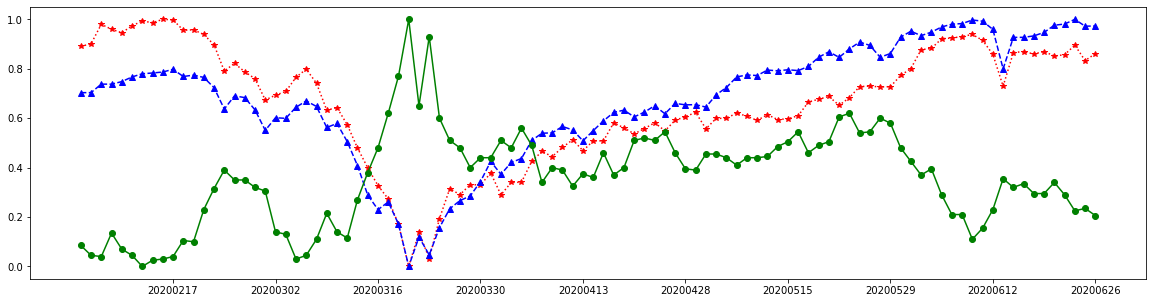

In [102]:
plt.figure(figsize=(20, 5))

data1 = preprocessing.minmax_scale(kospi_df["ncv"][::-1])
data2 = preprocessing.minmax_scale(kosdaq_df["ncv"][::-1])
data3 = preprocessing.minmax_scale(usd_df["nv"][::-1])

plt.plot(kospi_df["dt"][::-1], data1, "r*:", label="kospi")
plt.plot(kosdaq_df["dt"][::-1], data2, "b^--", label="kosdaq")
plt.plot(usd_df["dt"][::-1], data3, "go-", label="usd")

step = len(kospi_df) // 10
plt.xticks(kospi_df[::step]["dt"][::-1])

plt.show()

In [103]:
np.corrcoef(data1, data2)[0, 1] ** 2, np.corrcoef(data1, data3)[0, 1] ** 2 #제곱하면 r 스퀘어 값

(0.7419305162969759, 0.5633053032181276)

    CSS Selector

###웹 크롤링 :html
1. 웹서비스 분석 :URL
2. URL>Request, Response : JSON(str)
3. HTML(str) > bs_obj(parsing) > bs_obj - css selector : DF
-BeautifulSoup : css selector 사용

In [108]:
keyword= "삼성전자"
url="https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query={}".format(keyword)


In [109]:
response = requests.get(url)


In [110]:
#pasrsing
from bs4 import BeautifulSoup as bs
dom = bs(response.content, "html.parser")


In [115]:
#css selector
element=dom.select("._related_keyword_ul > li")
element[0]

<li> <a data-area="*q" data-idx="1" href="?where=nexearch&amp;query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90%EC%9A%B0&amp;ie=utf8&amp;sm=tab_she&amp;qdt=0">삼성전자우</a> </li>

In [117]:
element[0].text.strip()

'삼성전자우'

In [120]:
keyword = [element.text.strip() for element in element]
df= pd.DataFrame({"keyword":keyword})
df

,keyword
0,삼성전자우
1,카카오
2,삼성
3,네이버
4,삼성중공업우
5,셀트리온
6,sk하이닉스
7,코스피
8,삼성전자서비스센터
9,삼성sdi


In [121]:
# xpath
!pip install scrapy

     |████████████████████████████████| 241 kB 246 kB/s eta 0:00:01
     |████████████████████████████████| 192 kB 74 kB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 36 kB/s eta 0:00:015
     |████████████████████████████████| 3.2 MB 54 kB/s eta 0:00:012
     |████████████████████████████████| 52 kB 274 kB/s eta 0:00:01
     |████████████████████████████████| 77 kB 158 kB/s eta 0:00:01
     |████████████████████████████████| 155 kB 60 kB/s eta 0:00:01
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11515 sha256=0547fd30dee4ee40ec4a36e89805ee7713a7563f3b942247b484195a53217aea
  Stored in directory: /Users/yeonghwanchoi/Library/Caches/pip/wheels/dc/d0/bf/0cc715c01fce0bace63b46283acf5cc630d5e5dbb4602c54e5
  Created wheel for protego: filename=Protego-0.1.16-py3-none-any.whl size=7765 sha256=ca6c3393686ed10ef14feb8be9ad6e0580d8093e61db74cbd7c247de9f9bfcaa
  Stored in directory: /Users/yeonghwanchoi/Library/Caches/pip/wheels/ca/44/01/3592c

In [123]:
import scrapy
from scrapy.http import TextResponse

In [124]:
#url
keyword= "삼성전자"
url="https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query={}".format(keyword)

In [125]:
#req, rep
response = requests.get(url)

In [126]:
#rep -> TextResponse obj-> xpath 사용 : DF

####xpath 문법
- '//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li[1]'
- '//' :가장 상위 엘리먼트
- '*': 모든 하위 엘리먼트에서 찾음
- '//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li[1]': 속성값의 키 : id, 벨류 : '@id="nx_related_keywords"'를 선택
- '/': 한단계 하위 엘리먼트에서 찾음
- '[]'
    - 속성값으로 엘리먼트 찾기 
    - 숫자가 오면 몇 번째 엘리먼트를 의미
모든 li를 찾는 다면 뒤에 index 를 지워 주면 다 찾음 '//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li'

In [142]:
tr_obj = TextResponse(response.url, body=response.text, encoding='utf-8')

In [143]:
selector = '//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li[1]'
# datas = tr_obj.xpath(selector)

In [144]:
# datas[0]

In [145]:
# datas.xpath('a/text()').extract()

In [148]:
selector = '//*[@id="nx_related_keywords"]/dl/dd[1]/ul/li/a/text()'
datas = tr_obj.xpath(selector).extract()
datas

['삼성전자우',
 '카카오',
 '삼성',
 '네이버',
 '삼성중공업우',
 '셀트리온',
 'sk하이닉스',
 '코스피',
 '삼성전자서비스센터',
 '삼성sdi']

일반적인 크롤링방법으로는 막힘. fake_useragent 사용.  
- 패키지 설치 : `pip install fake-useragent`

In [105]:
from fake_useragent import UserAgent

ModuleNotFoundError: No module named 'fake_useragent'

In [ ]:
headers = {
    'user-agent': UserAgent().chrome,
    'referer': 'https://new.land.naver.com/complexes?ms=37.637433,126.832359,15&a=APT:ABYG:JGC&e=RETAIL'
} # 개발자 도구에서 header 정보에서 확인 가능

response = requests.get(url, headers = headers) 
response

In [ ]:
response.text #JSON 타입 테이블로 크롤링됨.

In [ ]:
data = response.json()

In [ ]:
result_df = pd.DataFrame(data) # Pandas로 데이터프레임화
result_df.tail()
# result_df.to_csv('real_estate.csv') # CSV 파일로 저장